
# **Reporte de calidad de los datos de la artista Taylor Swift en Spotify**



### **Introducción**
En el siguiente reporte de calidad de los datos del dataset extraído de spotify, contiene una muestra de las estadísticas de la cantante Taylor Swift en dicha plataforma de audio streaming. Para el análisis se inició con una presentación de generalidades de los datos, que pone en contexto sobre los elementos que conforman el dataset. Seguidamente, se realizó una análisis de la distribución y calidad de los datos categóricos y por último de los datos numéricos. Analizando cada una de las variables y presentando conclusiones sobre los campos en los cuales se hayaron anomalías. Los campos que no fueron mencionados en el análisis disponen de la información correcta par aun posterior análisis de negocio.



### **Generalidades de los datos**

A partir del archivo taylor_swift_spotify.json se extrajó un dataset que se encuentra conformado por 27 columnas y 539 registros. Para ejemplarizar, el dataset obtenidos, a continuación, se presentan los primeros 10 registros del mismo.

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
with open('taylor_swift_spotify.json') as f:
        data = json.loads(f.read())
data

{'artist_id': '06HL4z0CvFAxyc27GX',
 'artist_name': 'Taylor Swift',
 'artist_popularity': 120,
 'albums': [{'album_id': '1o59UpKw81iHR0HPiSkJR0',
   'album_name': "1989 (Taylor's Version) [Deluxe]",
   'album_release_date': '2023-10-27',
   'album_total_tracks': 22,
   'tracks': [{'disc_number': 1,
     'duration_ms': 212600,
     'explicit': False,
     'track_number': 1,
     'audio_features': {'danceability': 0.757,
      'energy': 0.61,
      'key': 7,
      'loudness': -4.84,
      'mode': 1,
      'speechiness': 0.0327,
      'acousticness': 0.00942,
      'instrumentalness': 3.66e-05,
      'liveness': 0.367,
      'valence': 0.685,
      'tempo': 116.998,
      'id': '4WUepByoeqcedHoYhSNHRt',
      'time_signature': 4},
     'track_popularity': 77,
     'track_id': '4WUepByoeqcedHoYhSNHRt',
     'track_name': "Welcome To New York (Taylor's Version)"},
    {'disc_number': 1,
     'duration_ms': 231833,
     'explicit': False,
     'track_number': 2,
     'audio_features': {'danc

In [3]:
entries = data
parsed_data = dict()
def obtener_val_list(lista):
  for i in lista:
    for k, v in i.items():
      if not isinstance(v, (dict, list)):
        parsed_data.setdefault(f"{k}", []).append(v)
      elif isinstance(v, list):
        obtener_val_list(v)
      elif isinstance(v, dict):
        for att_k, att_v in v.items():
          parsed_data.setdefault(f"{k}.{att_k}", []).append(att_v)

#############
for key, val in entries.items():
  if not isinstance(val, list):
    parsed_data.setdefault(f"{key}", []).append(val)
  else:
    obtener_val_list(val)

parsed_data

{'artist_id': ['06HL4z0CvFAxyc27GX'],
 'artist_name': ['Taylor Swift'],
 'artist_popularity': [120],
 'album_id': ['1o59UpKw81iHR0HPiSkJR0',
  '64LU4c1nfjz1t4VnGhagcg',
  '5AEDGbliTTfjOB8TSm1sxt',
  '1fnJ7k0bllNfL1kVdNVW1A',
  '3lS1y25WAhcqJDATJK70Mq',
  '151w1FgRZfnKZA9FEcg9Z3',
  '6kZ42qRrzov54LcAk4onW9',
  '4hDok0OAJd57SGIT8xuWJH',
  '6AORtDjduMM3bupSWzbTSG',
  '2Xoteh7uEpea4TohMxjtaq',
  '0PZ7lAru5FDFHuirTkWe9Z',
  '1pzvBxYgT6OVwJLtHkrdQK',
  '2fenSS68JI1h4Fo296JfGr',
  '1NAmidJlEaVgA3MpcPFYGq',
  '1NAmidJlEaVgA3MpcPFYGq',
  '6DEjYFkNZh67HP7R9PSZvv',
  '1MPAXuTVL2Ej5x0JHiSPq8',
  '1yGbNOtRIgdIiGHOEBaZWf',
  '5fy0X0JmZRZnVa2UEicIOl',
  '1KVKqWeRuXsJDLTW0VuD29',
  '6fyR4wBPwLHKcRtxgd4sGh',
  '6Ar2o9KCqcyYF9J0aQP3au',
  '6S6JQWzUrJVcJLK4fi74Fw',
  '2gP2LMVcIFgVczSJqn340t',
  '08CWGiv27MVQhYpuTtvx83',
  '1ycoesYxIFymXWebfmz828',
  '5eyZZoQEFQWRHkV2xgAeBw'],
 'album_name': ["1989 (Taylor's Version) [Deluxe]",
  "1989 (Taylor's Version)",
  "Speak Now (Taylor's Version)",
  'Midnights (T

In [4]:
df= pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in parsed_data.items() ]))

In [5]:
df = df.ffill()
df.head()

,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks,disc_number,duration_ms,explicit,...,audio_features.acousticness,audio_features.instrumentalness,audio_features.liveness,audio_features.valence,audio_features.tempo,audio_features.id,audio_features.time_signature,track_popularity,track_id,track_name
0,06HL4z0CvFAxyc27GX,Taylor Swift,120.0,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22,1,212600,False,...,0.00942,0.000037,0.3670,0.685,116.998,4WUepByoeqcedHoYhSNHRt,4.0,77,4WUepByoeqcedHoYhSNHRt,Welcome To New York (Taylor's Version)
1,06HL4z0CvFAxyc27GX,Taylor Swift,120.0,64LU4c1nfjz1t4VnGhagcg,1989 (Taylor's Version),2023-10-26,21,1,231833,False,...,5,0,0.1680,0.701,96.057,0108kcWLnn2HlH2kedi1gn,4.0,78,0108kcWLnn2HlH2kedi1gn,Blank Space (Taylor's Version)
2,06HL4z0CvFAxyc27GX,Taylor Swift,120.0,5AEDGbliTTfjOB8TSm1sxt,Speak Now (Taylor's Version),2023-07-07,22,1,231000,False,...,0.000421,0.0197,0.0899,0.305,94.868,3Vpk1hfMAQme8VJ0SNRSkd,4.0,79,3Vpk1hfMAQme8VJ0SNRSkd,Style (Taylor's Version)
3,06HL4z0CvFAxyc27GX,Taylor Swift,120.0,1fnJ7k0bllNfL1kVdNVW1A,Midnights (The Til Dawn Edition),2027-05-26,24,1,235800,False,...,-0.000537,0.000056,0.3850,0.206,92.021,1OcSfkeCg9hRC2sFKB4IMJ,4.0,78,1OcSfkeCg9hRC2sFKB4IMJ,Out Of The Woods (Taylor's Version)
4,06HL4z0CvFAxyc27GX,Taylor Swift,120.0,3lS1y25WAhcqJDATJK70Mq,Midnights (3am Edition),2022-10-22,20,1,193289,False,...,0.000656,0,0.1310,0.520,96.997,2k0ZEeAqzvYMcx9Qt5aClQ,4.0,77,2k0ZEeAqzvYMcx9Qt5aClQ,All You Had To Do Was Stay (Taylor's Version)


Haciendo uso de la función info(), se describieron cada una de las columnas del dataset. Según el resultado, ninguna de las columnas posee datos nulos. Así mismo, se identificó que el dataset posee 8 columnas de tipo float, 5 de tipo int y 14 de tipo object. En la siguiente tabla se visualizan los tipo de datos para cada una de la columnas. No osbstante, se deben revisar en detalles los campos album_total_tracks, audio_features.danceability, audio_features.acousticness, audio_features.instrumentalness y audio_features.tempo, dado que aunque la función info los describe como datos de tipo object, sus naturaleza corresponde a datos de tipo numérico. Más adelante en este documento se analizan estos campos.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   artist_id                        539 non-null    object 
 1   artist_name                      539 non-null    object 
 2   artist_popularity                539 non-null    float64
 3   album_id                         539 non-null    object 
 4   album_name                       539 non-null    object 
 5   album_release_date               539 non-null    object 
 6   album_total_tracks               539 non-null    object 
 7   disc_number                      539 non-null    int64  
 8   duration_ms                      539 non-null    int64  
 9   explicit                         539 non-null    object 
 10  track_number                     539 non-null    int64  
 11  audio_features.danceability      539 non-null    object 
 12  audio_features.energy 

Aun cuando la función info() nos dijo que el dataset no cuenta con datos nulos, se verificó la existencia de datos vacíos, tales como campos de tipo script con comillas vacías ''. Para lo cual, se creó un nuevo dataset en el cual reemplazamos los campos vacíos por nan para posteriormente poder contabilizar cada uno de ellos. El resultado nos muestra que los campos album_name, audio_features.danceability, audio_features.acousticness, audio_features.tempo, track_id y track_name cuentan con campos vacíos.

In [7]:
df_na = df.replace(r'', np.NaN)
df_na.isna().sum()

artist_id                          0
artist_name                        0
artist_popularity                  0
album_id                           0
album_name                         1
album_release_date                 0
album_total_tracks                 0
disc_number                        0
duration_ms                        0
explicit                           0
track_number                       0
audio_features.danceability        1
audio_features.energy              0
audio_features.key                 0
audio_features.loudness            0
audio_features.mode                0
audio_features.speechiness         0
audio_features.acousticness        1
audio_features.instrumentalness    0
audio_features.liveness            0
audio_features.valence             0
audio_features.tempo               1
audio_features.id                  0
audio_features.time_signature      0
track_popularity                   0
track_id                           4
track_name                         4
d

### Distribución y calidad de los datos categóricos ###

Ahora bien, para analizar la distribución de los datos se dividieron las columnas del dataset. Por un lado, se realizó un análisis de las columnas detectadas como categóricos, posteriormente se analizaron las columnas con datos de tipo numéricos.

En primer lugar, nos vamos a centrar en las columnas de tipo object. Con la función describe(), identificamos que existen 2 columnas con un único registro, por tanto, esto podría suponer que estas columnas no cuentan con suficiente información para el análisis de negocio.

Por su parte, album_release_date, album_total_tracks, explicit, album_total_tracks, audio_features.danceability, audio_features.acousticness, audio_features.instrumentalness y audio_features.tempo paracen estar instanciados con un tipo de dato difenrente a la mayoría de los valores de cada columna. En el caso de explicit, parece corresponder a un campo de tipo booleano, dado que el dato más frecuente "False", así lo indica.

Finalmente, se logra identificar que para el campo track_id, el valor más frecuente corresponde a campo vacío, lo cual nos sugiere que debe realizarse una limpieza de este tipos de datos.


In [65]:
df.describe(include=[object]).transpose()

,count,unique,top,freq
artist_id,539,1,06HL4z0CvFAxyc27GX,539
artist_name,539,1,Taylor Swift,539
album_id,539,26,5eyZZoQEFQWRHkV2xgAeBw,513
album_name,539,25,Taylor Swift,513
album_release_date,539,23,1989-10-24,513
album_total_tracks,539,17,Thirteen,513
explicit,539,4,False,480
audio_features.danceability,539.0,268.0,0.602,10.0
audio_features.acousticness,539.0,402.0,0.101,5.0
audio_features.instrumentalness,539,240,0,235


En las columnas clasificadas como object, pero cuya naturaleza es de tipo numérica, se utilizó una función para transformar dichas columnas en datos de tipo número y con ello, poder contabilizar cuantos datos no numéricos contiene cada una de ellas. Como resultado, cada una cuenta con un campo diferente a número.

In [66]:
df[['audio_features.danceability', 'audio_features.acousticness', 'audio_features.instrumentalness', 'audio_features.tempo']].apply(pd.to_numeric, errors='coerce').isna().sum()

audio_features.danceability        1
audio_features.acousticness        1
audio_features.instrumentalness    1
audio_features.tempo               1
dtype: int64

En cuanto a duplicidad de los datos, se identificó que el dataset tiene un total de 18 registros duplicados, lo cual corresponde a un aproximado del 3% de los datos.

In [67]:
#cantidad de valores duplicados
len(df[df.duplicated()])

18

En cuanto a la unicidad de los datos, existen 3 columnas las cuales cuentan con un único valor, dichas columnas son: artist_id, artist_name y artist_popularity.

In [68]:
df.nunique()

artist_id                            1
artist_name                          1
artist_popularity                    1
album_id                            26
album_name                          25
album_release_date                  23
album_total_tracks                  17
disc_number                          2
duration_ms                        364
explicit                             4
track_number                        46
audio_features.danceability        268
audio_features.energy              348
audio_features.key                  12
audio_features.loudness            448
audio_features.mode                  2
audio_features.speechiness         292
audio_features.acousticness        402
audio_features.instrumentalness    240
audio_features.liveness            271
audio_features.valence             326
audio_features.tempo               451
audio_features.id                  519
audio_features.time_signature        3
track_popularity                    73
track_id                 

Ahora se procede a analizar los campos cuyo tipo de dato no coincide con la naturaleza de la información.

En primer lugar, se analizó album_total_tracks, el cual corresponde al número total de canciones en un album. Este campo cuenta con valores de tipo string que deben ser reemplazados para poder efectuar análisis sobre dicho campo.

In [69]:
df.album_total_tracks.unique()

array([22, 21, 24, 20, 13, 34, 26, 17, 10, 16, 18, 15, 46, 19, 14, 8,
       'Thirteen'], dtype=object)

De otra parte, el campo album_release_date es un campo de tipo fecha, aunque actualmente esta representado de tipo object. Este campo requiere la conversión a fecha para el manejo de series de tiempo. De otra parte, se identificó que existen fechas superiores al año actual, tal es el caso de la mayor fecha corresponde a un dato del 2027.

In [70]:
pd.to_datetime(df.album_release_date).describe()

<ipython-input-70-47072c0a8f21>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  pd.to_datetime(df.album_release_date).describe()


count                     539
unique                     23
top       1989-10-24 00:00:00
freq                      513
first     1989-10-24 00:00:00
last      2027-05-26 00:00:00
Name: album_release_date, dtype: object

Dado que existen fechas de años mayores al año en curso, se contabilizó la cantidad de registros cuya fecha sea mayor de la fecha actual. De lo anteior, se encontró que solo un registro posee una fecha mayor.

In [90]:
df.album_release_date[pd.to_datetime(df.album_release_date) > datetime.today()].unique()

array(['2027-05-26'], dtype=object)

En la columan explicit, la cual según la función info(), sus datos son de tipo object, se identificó que tiene además de los datos booleanos: True, False; tiene datos de tipo string 'Si' y 'No'. Por lo cual, se debe estandarizar los datos para poder efectuar análisis sobre dicha columna.

In [72]:
df.explicit.unique()

array([False, True, 'Si', 'No'], dtype=object)

###Distribución y calidad de los datos numéricos ###
En la siguiente tabla se observan la distribución de los datos de tipo numérico. Se identificó que el campo artist_popularity presenta el mismo valor en todos los registros del dataset, por lo cual, podría corresponder a un dato que no aporta mucha información para el análisis.

Para el análisis de calidad de los datos se utilizó la función describe() y una reprentación gráfica de la distribución de cada uno de los datos de tipo numérico. Como resultado se concluye lo siguiente:


* El campo artist_popularity corresponde a la popularidad del artista y es medidaen valores entre 0 y 100. Es calculada a partir de la popularidad de las cancione del artista, es decir del tack_popularity. El valor registrado en el dataset para artist_popularity es de 120, lo cual representa un error por estar fuera del margen de medida. Adicionalmente, dicho valor de 120 no refleja correlación con track_popularity, dado que la media de track_popularity es de 62.91 y la media de artist_popularity es de 120.

* Los campos album_total_tracks y track_number estan directamente relacionados, toda vez que el campo album_total_track corresponde al total de canciones en un album y el track_number corresponde a la ubicación de la canción en el album. Tras el análisis de ambos campos se identificó que en los siguentes albumnes 'reputation', '1989', '', 'Speak Now', 'Taylor Swift', existen track_numer con un valor superior al total de canciones del albumn.

* El campo duration_ms corresponde a la duración de la canción en milisegundo, como observamos en la distribución y en la gráfica, el dataset tiene valores negativos, lo cual es un error, dado que la duración de las canciones corresponden a valores positivos mayores a cero. De otra parte, una canción con duración de 10 minutos podría ser un error o un caso atípico.

* El campo audio_feature.speechiness se encuentra dentro de la escala de 0 a 1, sin embargo, el valor maxímo cercano a 1, permite concluir que más que una canción el audio puede corresponder más a una entrevista. Por lo que, quizás este dato sea un error o un caso atípico.

* El campo audio_features.acousticness identifica si la pista es acústica o no. Por tanto, sus valores son binarios, 0 o 1, pero el dataset tiene datos de 2 y 5 que estan fuera del rango de medida permitido.

* El campo track_popularity mide la popularidad de una canción y es medida en una escala de 0 a 100. El dataset cuenta con valores negativos fuera del rango de medida.  




In [74]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
artist_popularity,539.0,120.000000,0.000000,120.0000,120.00000,120.0000,120.0000,120.000
disc_number,539.0,1.031540,0.174934,1.0000,1.00000,1.0000,1.0000,2.000
duration_ms,539.0,236003.725417,55019.871010,-223093.0000,209486.50000,233626.0000,259045.5000,613026.000
track_number,539.0,11.280148,7.965621,1.0000,5.00000,10.0000,15.0000,46.000
audio_features.energy,539.0,0.573625,0.192307,0.1180,0.43800,0.5900,0.7295,0.949
audio_features.key,539.0,4.586271,3.243162,0.0000,2.00000,5.0000,7.0000,11.000
audio_features.loudness,539.0,-7.519636,2.927941,-17.9320,-9.28200,-6.9420,-5.3770,-1.909
audio_features.mode,539.0,0.912801,0.282388,0.0000,1.00000,1.0000,1.0000,1.000
audio_features.speechiness,539.0,0.057648,0.073092,0.0231,0.03050,0.0377,0.0564,0.912
audio_features.liveness,539.0,0.163175,0.141702,0.0335,0.09635,0.1150,0.1615,0.931


<Axes: xlabel='album_total_tracks'>

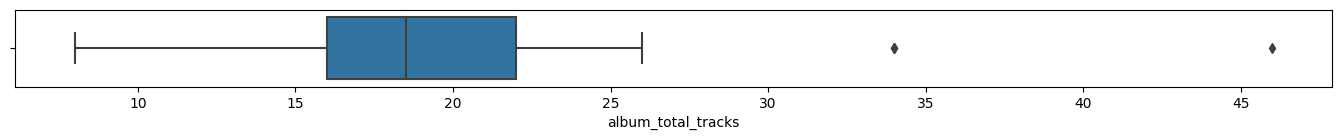

In [89]:
df_total_tracks = df['album_total_tracks'].apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(17,1))
sns.boxplot(data=df_total_tracks,
            x=df_total_tracks)

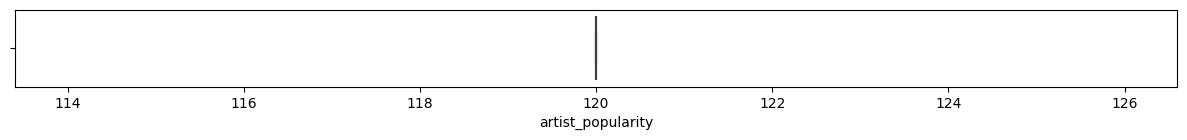

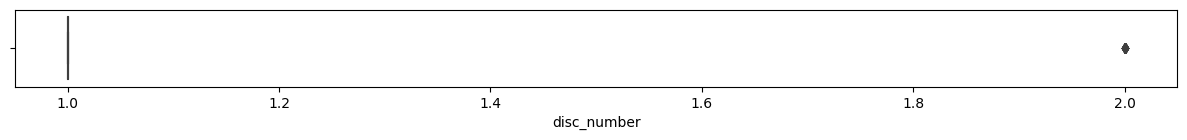

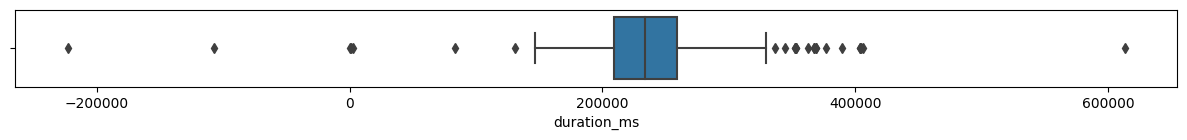

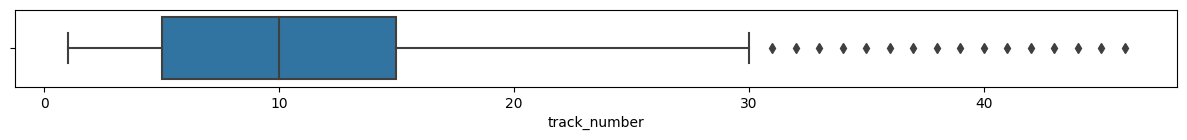

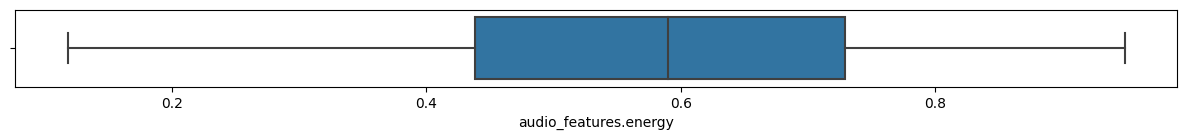

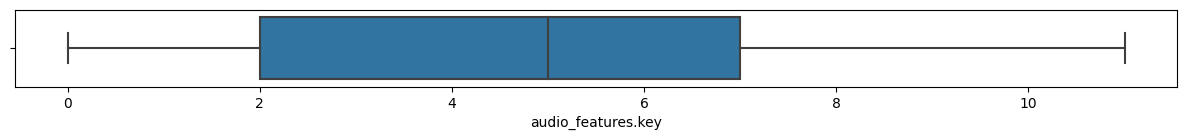

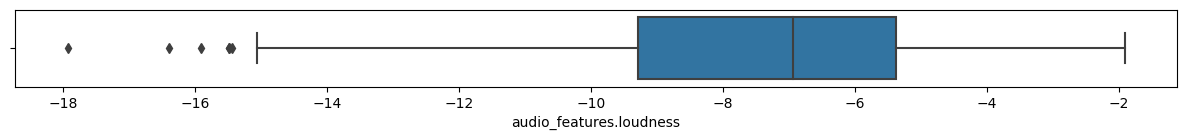

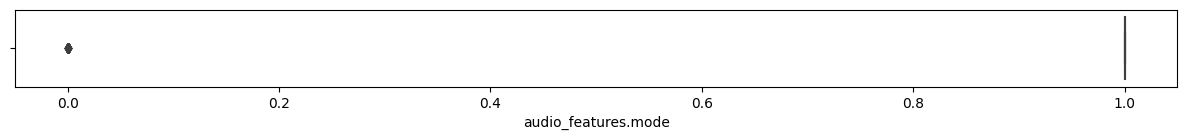

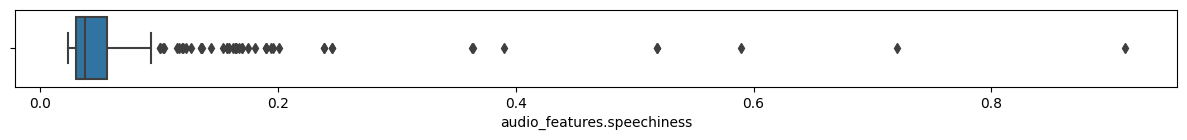

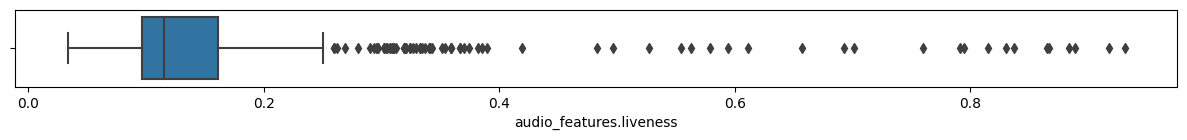

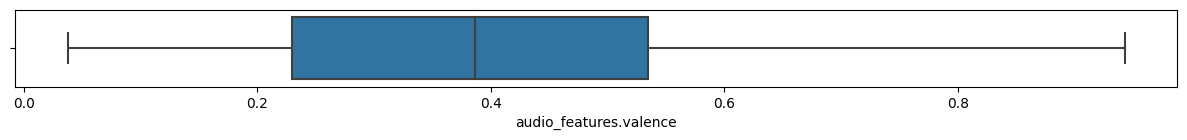

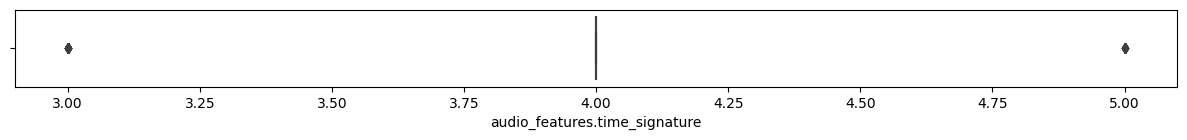

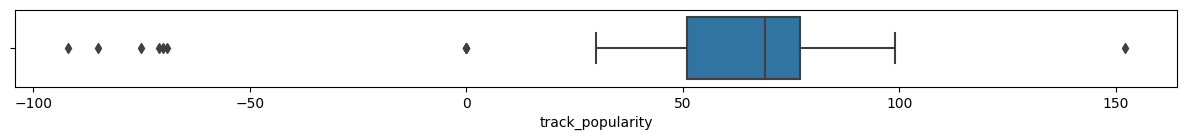

In [75]:
for column in df:
  if df[column].dtypes != object:
    plt.figure(figsize=(15,1))
    sns.boxplot(data=df, x=column)

<Axes: xlabel='audio_features.danceability'>

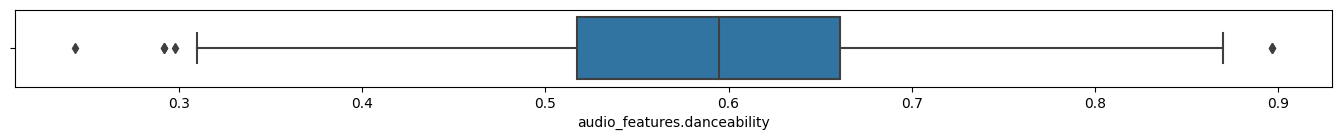

In [76]:
df_danceability = df['audio_features.danceability'].apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(17,1))
sns.boxplot(data=df_danceability,
            x=df_danceability)

<Axes: xlabel='audio_features.acousticness'>

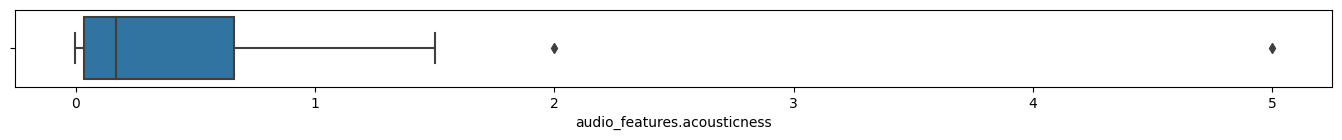

In [77]:
df_acousticness = df['audio_features.acousticness'].apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(17,1))
sns.boxplot(data=df_acousticness,
            x=df_acousticness)

<Axes: xlabel='audio_features.instrumentalness'>

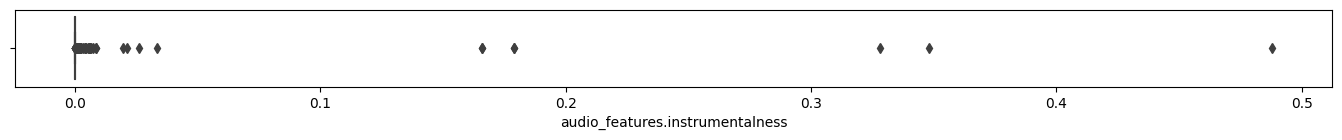

In [78]:
df_instrumentalness = df['audio_features.instrumentalness'].apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(17,1))
sns.boxplot(data=df_instrumentalness,
            x=df_instrumentalness)

<Axes: xlabel='audio_features.tempo'>

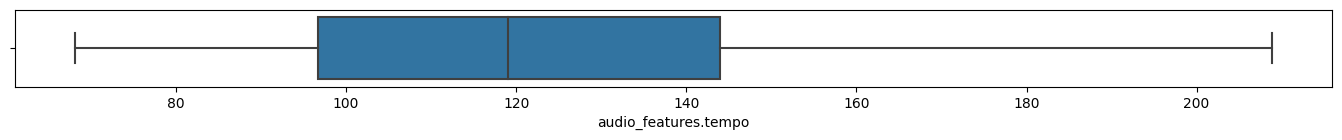

In [87]:
df_tempo = df['audio_features.tempo'].apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(17,1))
sns.boxplot(data=df_tempo,
            x=df_tempo)

In [85]:
df_repl_13 = df.replace("Thirteen", 13)
df_tracks_numbers = df_repl_13[['album_name','track_number', 'album_total_tracks']]
df_tracks_numbers['album_name'][df_tracks_numbers['track_number'] > df_tracks_numbers['album_total_tracks']].unique()

array(['reputation', '1989', '', 'Speak Now', 'Taylor Swift'],
      dtype=object)